In [1]:
pip install pymysql sqlalchemy pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [22]:
from sqlalchemy import create_engine
import pandas as pd

# DB 접속 정보
user = "root"
password = "1234"
host = "localhost"
port = 3306
database = "sun_good"

engine = create_engine(
    f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}"
)


In [23]:
query='''SELECT u.region,l.device,COUNT(DISTINCT u.user_id)AS 방문자수,AVG(l.purchased)AS 구매전환율,AVG(l.stay_time)AS 평균체류시간,SUM(o.price * o.qty)AS 총매출
FROM logs l JOIN users u
ON l.user_id=u.user_id
JOIN orders o
ON o.user_id=u.user_id
GROUP BY u.region,l.device
HAVING AVG(l.purchased)>=0.25 AND AVG(l.stay_time)>=(SELECT avg(l.stay_time) FROM logs l)
ORDER BY SUM(o.price * o.qty) DESC;
'''

In [24]:
query2='''SELECT case
			when u.age>=20 AND u.age<30 then '20대'
			when u.age>=30 AND u.age<40 then '30대'
			when u.age>=40 AND u.age<50 then '40대'
			ELSE '기타'
			END AS 연령대 ,u.region,AVG(l.purchased)AS 구매전환율,AVG(o.price * o.qty) AS 평균주문금액 
FROM orders o JOIN users u
ON o.user_id=u.user_id
JOIN logs l 
ON l.user_id=u.user_id
GROUP BY case
			when u.age>=20 AND u.age<30 then '20대'
			when u.age>=30 AND u.age<40 then '30대'
			when u.age>=40 AND u.age<50 then '40대'
			ELSE '기타'
			END ,u.region
'''

In [25]:
df=pd.read_sql(query,engine)

In [26]:
df1=pd.read_sql(query2,engine)

In [27]:
df

,region,device,방문자수,구매전환율,평균체류시간,총매출
0,Busan,PC,2,0.6667,666.6667,140000.0
1,Incheon,PC,1,1.0000,650.0000,50000.0
2,Seoul,PC,1,1.0000,420.0000,30000.0


In [28]:
df1

,연령대,region,구매전환율,평균주문금액
0,20대,Seoul,0.5000,30000.0000
1,30대,Daegu,1.0000,36000.0000
2,30대,Incheon,1.0000,50000.0000
3,30대,Seoul,1.0000,30000.0000
4,40대,Busan,0.6667,46666.6667


In [29]:
df['구매전환율']=df['구매전환율']*100

In [30]:
df

,region,device,방문자수,구매전환율,평균체류시간,총매출
0,Busan,PC,2,66.67,666.6667,140000.0
1,Incheon,PC,1,100.00,650.0000,50000.0
2,Seoul,PC,1,100.00,420.0000,30000.0


In [31]:
df['평균체류시간']=df['평균체류시간']/60

In [32]:
df

,region,device,방문자수,구매전환율,평균체류시간,총매출
0,Busan,PC,2,66.67,11.111112,140000.0
1,Incheon,PC,1,100.00,10.833333,50000.0
2,Seoul,PC,1,100.00,7.000000,30000.0


In [33]:
df['총매출']=df['총매출']/10000

In [34]:
df

,region,device,방문자수,구매전환율,평균체류시간,총매출
0,Busan,PC,2,66.67,11.111112,14.0
1,Incheon,PC,1,100.00,10.833333,5.0
2,Seoul,PC,1,100.00,7.000000,3.0


In [35]:
df

,region,device,방문자수,구매전환율,평균체류시간,총매출
0,Busan,PC,2,66.67,11.111112,14.0
1,Incheon,PC,1,100.00,10.833333,5.0
2,Seoul,PC,1,100.00,7.000000,3.0


In [38]:
df1=df1.round(0)

In [39]:
df1

,연령대,region,구매전환율,평균주문금액
0,20대,Seoul,0.0,30000.0
1,30대,Daegu,1.0,36000.0
2,30대,Incheon,1.0,50000.0
3,30대,Seoul,1.0,30000.0
4,40대,Busan,1.0,46667.0


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df

,region,device,방문자수,구매전환율,평균체류시간,총매출
0,Busan,PC,2,66.67,11.111112,14.0
1,Incheon,PC,1,100.00,10.833333,5.0
2,Seoul,PC,1,100.00,7.000000,3.0


In [47]:
sns.set_style('whitegrid')              # 그리드 있는 깔끔한 스타일
plt.rc('font', family='Malgun Gothic')  # 한글 폰트(윈도우: 맑은 고딕)
plt.rc('axes', unicode_minus=False)  

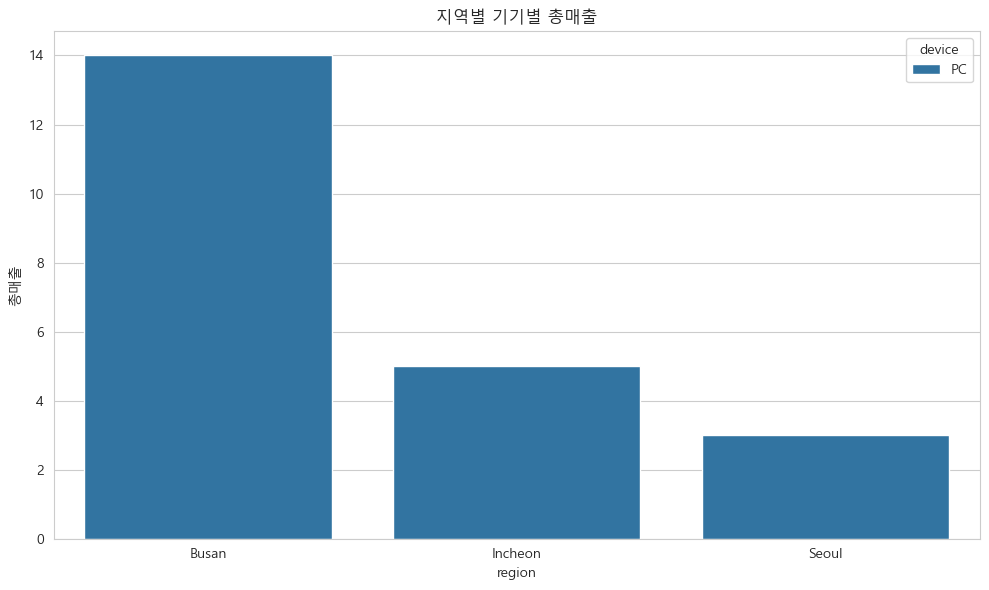

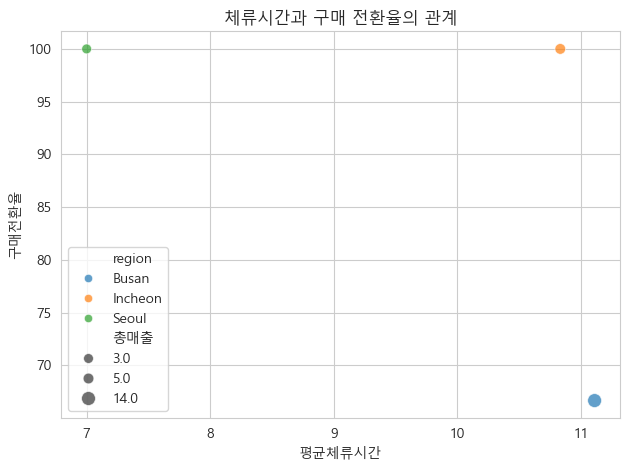

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='region',y='총매출',hue='device')
plt.title('지역별 기기별 총매출')
plt.tight_layout()
plt.show()

sns.scatterplot(data=df,x='평균체류시간',y='구매전환율',size='총매출',hue='region',sizes=(50,100),alpha=0.7)
plt.title('체류시간과 구매 전환율의 관계')
plt.tight_layout()
plt.show()